In [ ]:
# pour l'analyse exploratoire des données (EDA)

In [4]:
# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns

# SCIKIT-LEARN: SELECTION DE VARIABLES

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer 

# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression

# SCIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # Séparer en données train et test
from sklearn.model_selection import cross_val_score # Validation croisée pour comparison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation : visulaisr des scores lors du choix d'un hyper-paramètre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyper-paramètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage : visualisation des scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEURll
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


In [1]:
!pip install ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 



In [10]:
# Dimensions
X.shape

(48842, 14)

In [11]:
# Dimensions
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [9]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


# Description des Features de la Base de Données

## age
- **Type**: Continue
- **Description**: Âge de l'individu.

## workclass
- **Type**: Catégorielle
- **Valeurs possibles**: 
  - Private
  - Self-emp-not-inc  (travailleur independant non incorporé)
  - Self-emp-inc
  - Federal-gov
  - Local-gov
  - State-gov
  - Without-pay
  - Never-worked

## fnlwgt
- **Type**: Continue
- **Description**: Poids d'instance final utilisé pour ajuster l'échantillon afin qu'il soit représentatif de la population totale. ( par exemple si un individu a un fnlwgt de valeur 500, alors cet individu représente 500 personnes de la population totale)

## education
- **Type**: Catégorielle
- **Valeurs possibles**: 
  - Bachelors
  - Some-college
  - 11th
  - HS-grad
  - Prof-school
  - Assoc-acdm
  - Assoc-voc
  - 9th
  - 7th-8th
  - 12th
  - Masters
  - 1st-4th
  - 10th
  - Doctorate
  - 5th-6th
  - Preschool

## education-num
- **Type**: Continue
- **Description**: Nombre d'années d'éducation de l'individu.

## marital-status
- **Type**: Catégorielle
- **Valeurs possibles**: 
  - Married-civ-spouse
  - Divorced
  - Never-married
  - Separated
  - Widowed
  - Married-spouse-absent
  - Married-AF-spouse

## occupation
- **Type**: Catégorielle
- **Valeurs possibles**: 
  - Tech-support
  - Craft-repair
  - Other-service
  - Sales
  - Exec-managerial
  - Prof-specialty
  - Handlers-cleaners
  - Machine-op-inspct
  - Adm-clerical
  - Farming-fishing
  - Transport-moving
  - Priv-house-serv
  - Protective-serv
  - Armed-Forces

## relationship
- **Type**: Catégorielle
- **Valeurs possibles**: 
  - Wife
  - Own-child
  - Husband
  - Not-in-family
  - Other-relative
  - Unmarried

## race
- **Type**: Catégorielle
- **Valeurs possibles**: 
  - White
  - Asian-Pac-Islander
  - Amer-Indian-Eskimo
  - Other
  - Black

## sex
- **Type**: Catégorielle
- **Valeurs possibles**: 
  - Female
  - Male

## capital-gain
- **Type**: Continue
- **Description**: Gains en capital de l'individu.

## capital-loss
- **Type**: Continue
- **Description**: Pertes en capital de l'individu.

## hours-per-week
- **Type**: Continue
- **Description**: Nombre d'heures travaillées par semaine par l'individu.

## native-country
- **Type**: Catégorielle
- **Valeurs possibles**: 
  - United-States
  - Cambodia
  - England
  - Puerto-Rico
  - Canada
  - Germany
  - Outlying-US(Guam-USVI-etc)
  - India
  - Japan
  - Greece
  - South
  - China
  - Cuba
  - Iran
  - Honduras
  - Philippines
  - Italy
  - Poland
  - Jamaica
  - Vietnam
  - Mexico
  - Portugal
  - Ireland
  - France
  - Dominican-Republic
  - Laos
  - Ecuador
  - Taiwan
  - Haiti
  - Columbia
  - Hungary
  - Guatemala
  - Nicaragua
  - Scotland
  - Thailand
  - Yugoslavia
  - El-Salvador
  - Trinidad&Tobago
  - Peru
  - Hong
  - Holand-Netherlands


In [22]:
df = pd.concat([X, y], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  >=50k           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [23]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
>=50k              int64
dtype: object

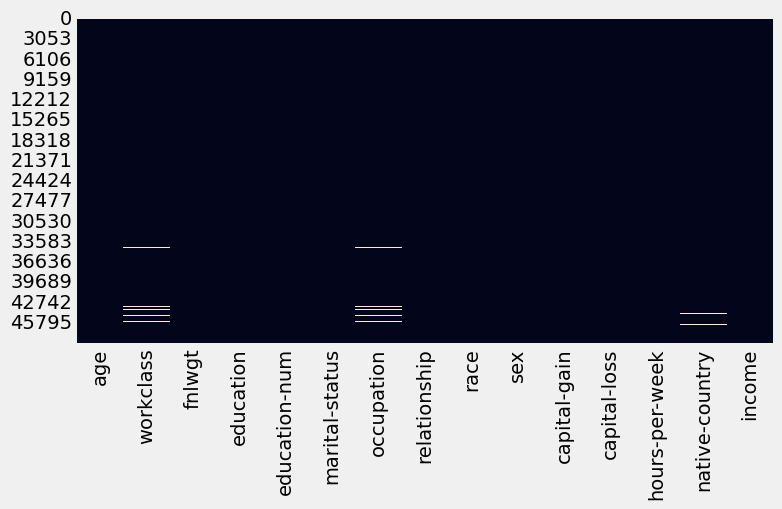

In [16]:
# Visualiser les valeurs manquantes
plt.figure(figsize=(8, 4))
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [21]:
# Clean the values in y to remove the trailing dots
y['income'] = y['income'].str.replace('<=50K.', '<=50K')
y['income'] = y['income'].str.replace('>50K.', '>50K')

# Transform the 'income' column to binary values and rename it to '>=50k'
y['>=50k'] = y['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Drop the original 'income' column
y = y.drop(columns=['income'])

y.value_counts()

>=50k
0        37155
1        11687
Name: count, dtype: int64